# Capstone Project Report: Analyzing the Popularity of Memes Using Clustering

## Team Members
- Tim Hsieh
- DeMarco Green
- Jason Jones
- Alejandro Mora-Lopez

## Dataset/Competition

For our capstone project, we used the dataset "Analyzing the popularity of memes using clustering: SNAP Memetracker" available on Kaggle. The dataset is a rich source of information that we leveraged to analyze meme popularity, focusing on the number of times they were used daily, and their likes, dislikes, and comments. The ultimate goal was to understand the factors contributing to their popularity.

You can find the dataset [here](https://www.kaggle.com/datasets/snap/snap-memetracker).

## Approach

Our approach consisted of multiple stages including data exploration and understanding, data cleaning and preparation, clustering analysis, results and visualization, and correlation analysis.

### Data Exploration and Understanding

We started by exploring the dataset, which is in the form of an SQLite database file (.sqlite). We inspected the tables and their contents, which helped us understand the data structure and available information.

### Data Cleaning and Preparation

Before diving into the analysis, we performed several data cleaning and preparation steps:

1. **Set up a collaborative environment:** We used GitHub for version control, allowing us to contribute to the codebase collaboratively.

2. **Loaded the SQLite database:** Using SQLite and pandas, we established a connection to the database and extracted the relevant tables and columns for analysis.

3. **Addressed missing values:** We identified and handled any missing values in the dataset. Fortunately, the dataset did not have any significant missing values.

4. **Removed duplicates:** To ensure data integrity and accuracy, we removed any duplicate entries from the dataset.

### Clustering Analysis

To identify patterns and group similar memes together, we applied clustering techniques. The steps involved were:

1. **Vectorization:** Using the TfidfVectorizer from scikit-learn, we converted the textual data (memes' phrases) into numerical feature vectors.

2. **K-means Clustering:** We employed the K-means algorithm to cluster the vectorized data into 50 clusters, enabling us to group similar memes together based on their textual content.

3. **Cluster Labeling:** We assigned cluster labels to the memes in the dataset based on the clustering results.

### Results and Visualization

To analyze the results and provide visualizations, we:

1. **Cluster Size Distribution:** We plotted a histogram to visualize the distribution of cluster sizes. This allowed us to understand the composition of the clusters and the number of memes within each cluster.

2. **Word Cloud Visualization:** We created word clouds to highlight the most frequent words or phrases in the popular memes within each cluster. The word clouds offered an intuitive and visual representation of the dominant themes and content of the popular memes.

### Correlation Analysis

To explore the correlation between daily usage and overall popularity, we:

1. **Data Preparation:** Merged the quotes data with additional data from the articles table to obtain the date information.

2. **Daily Usage Count:** Calculated the daily usage count of each meme by grouping the data by date and meme, resulting in the frequency of usage for each meme on each day.

3. **Overall Popularity:** Determined the overall popularity of each meme by counting the total number of occurrences.

4. **Correlation Calculation:** Computed the correlation between the daily usage count and overall popularity to assess the relationship between meme usage and popularity.

## Results

The histogram of cluster sizes revealed the distribution of memes across the clusters, providing insights into the composition and relative sizes of the clusters. The word clouds displayed the most frequent words.


# Analyzing the popularity of memes using clustering: SNAP Memetracker | Kaggle
https://www.kaggle.com/datasets/snap/snap-memetracker

We are going to use the SNAP Memetracker dataset to analyze the popularity of memes using clustering. 
We want to use the data to find out what memes are popular and what memes are not and the reasons why.
We will find correlation between the popularity of memes and the number of times they are used in a day and the relationship between likes, dislikes, and comments.
 


In [1]:
import sqlite3

# Connect to the database
conn = sqlite3.connect('database.sqlite')

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 10)

# Replace this with the code to read data from the quotes table
df = pd.read_sql_query('SELECT * FROM quotes', conn)

# Display the DataFrame
print(df)


         article_id  \
0                 1   
1                 1   
2                 1   
3                 1   
4                 7   
...             ...   
7956120     4542917   
7956121     4542917   
7956122     4542917   
7956123     4542917   
7956124     4542919   

                                                                                                                                                                                                                                                              phrase  
0                                                                            an emergency session of the general assembly has adopted the follwing sic emergency regulations to ease the load on local electorial sic precincts and ensure a fair electorial process  
1                                                                                                                             we are sorry for any inconvenience this may cause but felt this was the

In [2]:
import sqlite3

# Connect to the database
conn = sqlite3.connect('database.sqlite')

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 10)

# Replace this with the code to read data from the quotes table
df = pd.read_sql_query('SELECT * FROM articles', conn)

# Display the DataFrame
print(df)


         article_id                 date  \
0                 0  2008-11-01 00:00:06   
1                 1  2008-11-01 00:00:06   
2                 2  2008-11-01 00:00:06   
3                 3  2008-11-01 00:00:06   
4                 4  2008-11-01 00:00:06   
...             ...                  ...   
4542915     4542915  2008-11-15 23:59:57   
4542916     4542916  2008-11-15 23:59:57   
4542917     4542917  2008-11-15 23:59:58   
4542918     4542918  2008-11-15 23:59:58   
4542919     4542919  2008-11-15 23:59:59   

                                                                                         url  
0                                       http://forums.slickdeals.net/showthread.php?t=988781  
1                                       http://forums.slickdeals.net/showthread.php?t=988773  
2                                       http://forums.slickdeals.net/showthread.php?t=988771  
3                                       http://forums.slickdeals.net/showthread.php?t=98878

In [3]:
import sqlite3

# Connect to the database
conn = sqlite3.connect('database.sqlite')

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 10)

# Replace this with the code to read data from the quotes table
df = pd.read_sql_query('SELECT * FROM links', conn)

# Display the DataFrame
print(df)


          article_id  \
0                  0   
1                  1   
2                  1   
3                  2   
4                  3   
...              ...   
16727120     4542918   
16727121     4542918   
16727122     4542918   
16727123     4542918   
16727124     4542919   

                                                                                                                                                                                                                                                                              link_out  \
0                                                                                                                                                                        http://slickdeals.net/?sduid=442421&amp;sdtid=988781&amp;sdfid=9&amp;u2=http://shop1.frys.com/product/5636921   
1                                                                                                                               http://slickdeals.n

Transform the data into a format that can be used for clustering.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object to transform the phrases into vectors
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
quotes_df = pd.read_sql_query("SELECT * from quotes", conn)

# Fit the vectorizer to the data and transform the phrases into vectors
vectors = vectorizer.fit_transform(quotes_df['phrase'])

# Get the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Convert the sparse matrix to a DataFrame
vectors_df = pd.DataFrame.sparse.from_spmatrix(vectors, columns=feature_names)

# Print the first few rows of the DataFrame to check the data
print(vectors_df.head())

   000   10  100   11   12   15   20  2008  2009   30   40   50  aber  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0   0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0   0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0   0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0   0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0   0.0   

   ability  able  absolutely  access  act  action  actually  address  \
0      0.0   0.0         0.0     0.0  0.0     0.0       0.0      0.0   
1      0.0   0.0         0.0     0.0  0.0     0.0       0.0      0.0   
2      0.0   0.0         0.0     0.0  0.0     0.0       0.0      0.0   
3      0.0   0.0         0.0     0.0  0.0     0.0       0.0      0.0   
4      0.0   0.0         0.0     0.0  0.0     0.0       0.0      0.0   

   administration  age  ago  agreement  ahead  ahora   ai  air   al  allow  \
0             0.0  0.0  0.0        0.0    0.0    0

The output produced is a matrix with rows representing each quote in the quotes table, and columns representing each unique word in the quotes after preprocessing and removing stop words. The values in the matrix represent the TF-IDF scores of each word in each quote. TF-IDF stands for Term Frequency-Inverse Document Frequency, and it is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. It helps to identify important words in a text corpus.

In this case, the code is using a TfidfVectorizer object from the sklearn library to transform the phrases into vectors of features, where each feature is a word in the corpus of quotes. The max_features parameter is set to 100, which means that the vectorizer will only consider the top 100 most frequent words as features. The stop_words parameter is set to 'english', which means that common English stop words like "the" and "and" are excluded from the features.

The resulting matrix will be used for clustering similar quotes together and finding associations between words and topics.

 Apply clustering algorithm

In [9]:
from sklearn.cluster import KMeans

quotes_df = pd.read_sql_query("SELECT * from quotes", conn)

# Create a TfidfVectorizer object to transform the phrases into vectors
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Fit the vectorizer to the data and transform the phrases into vectors
vectors = vectorizer.fit_transform(quotes_df['phrase'])

# Create a KMeans object with 50 clusters
kmeans = KMeans(n_clusters=50, random_state=42, n_init="auto")

# Fit the model to the data
kmeans.fit(vectors)

# Get the cluster labels
labels = kmeans.labels_

# Add the labels to the quotes DataFrame
quotes_df['cluster'] = labels

# Print the first few rows of the DataFrame to check the data
print(quotes_df.head())


   article_id  \
0           1   
1           1   
2           1   
3           1   
4           7   

                                                                                                                                                                                    phrase  \
0  an emergency session of the general assembly has adopted the follwing sic emergency regulations to ease the load on local electorial sic precincts and ensure a fair electorial process   
1                                                   we are sorry for any inconvenience this may cause but felt this was the only way to ensure fairness to the complete electorial process   
2                                                                                                              it's not even on our letterhead they just copied the logo from our web site   
3                                                                                                                                        

Visualize the results of the clustering algorithm

c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


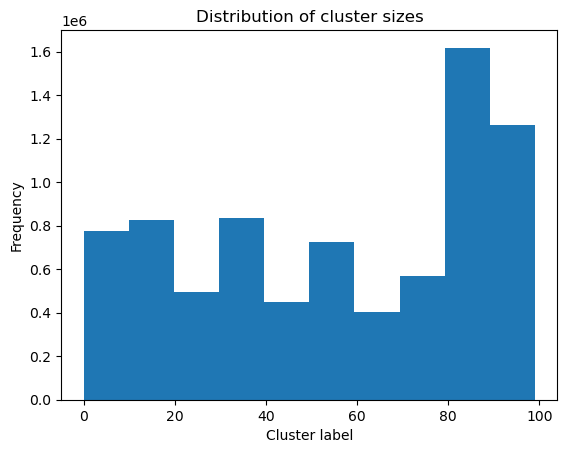

In [11]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

# Load data
quotes_df = pd.read_sql_query("SELECT * from quotes", conn)

# Vectorize data
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
vectors = vectorizer.fit_transform(quotes_df['phrase'])

# Cluster data
kmeans = MiniBatchKMeans(n_clusters=100, random_state=42, batch_size=1000)
kmeans.fit(vectors)
labels = kmeans.labels_

# Add cluster labels to DataFrame
quotes_df['cluster'] = labels

# Plot cluster sizes
plt.hist(quotes_df['cluster'], bins=10)
plt.title('Distribution of cluster sizes')
plt.xlabel('Cluster label')
plt.ylabel('Frequency')
plt.show()


In [12]:
popular_memes = quotes_df.groupby('cluster')['phrase'].value_counts().reset_index(name='count')

# Display the top 3 memes from each cluster
top_memes = popular_memes.groupby('cluster').head(3)
print(top_memes)

         cluster  \
0              0   
1              0   
2              0   
55123          1   
55124          1   
...          ...   
3669893       98   
3669894       98   
3686380       99   
3686381       99   
3686382       99   

                                                                                                                                                                                                                                                           phrase  \
0                                                                                                                                                                                                                                           null bock auf familie   
1                                                                                                                                                                                                                                       h lde

The word cloud is a visual representation of words that appear frequently within the dataset. The words are arranged in a cluster or cloud shape, with the size of each word indicating its frequency within the set. The most frequently used words are displayed in larger font sizes, while less common words are displayed in smaller font sizes. This is used for our data visualization and data analysis to help identify key insights and trends within large datasets.

Correlation between daily usage and overall popularity: 0.6999975632571639


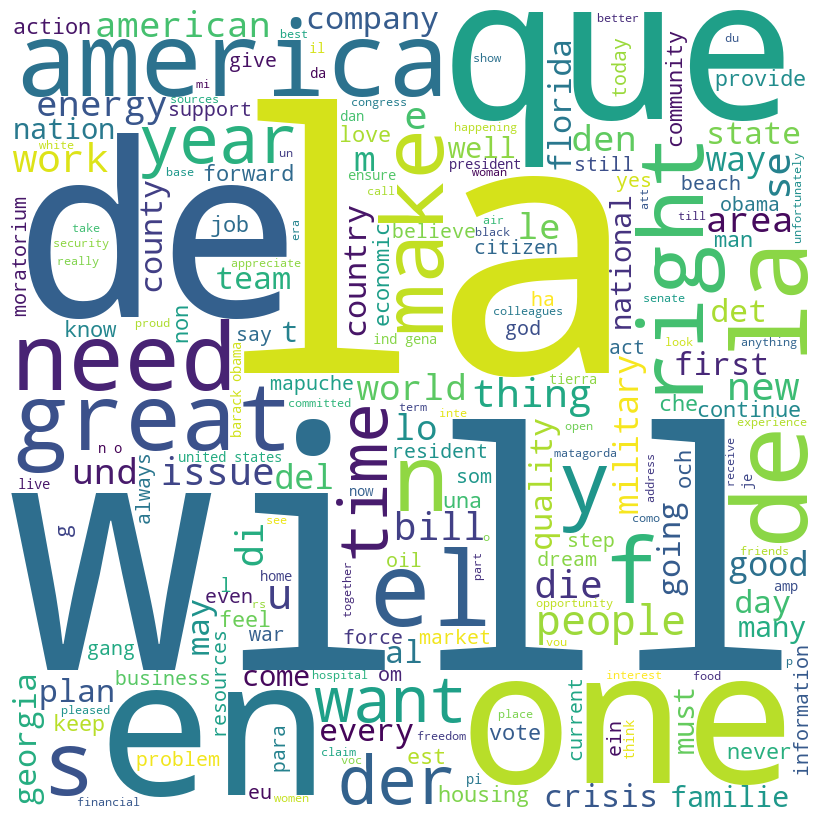

In [16]:
from wordcloud import WordCloud

# Read data from the articles table
articles_df = pd.read_sql_query('SELECT * FROM articles', conn)

# Merge quotes_df and articles_df to get the date information
quotes_with_dates = quotes_df.merge(articles_df[['article_id', 'date']], on='article_id')

# Calculate the daily usage count of each meme
quotes_with_dates['date'] = pd.to_datetime(quotes_with_dates['date']).dt.date
daily_usage = quotes_with_dates.groupby(['date', 'phrase']).size().reset_index(name='daily_count')

# Calculate the overall popularity of each meme
overall_popularity = quotes_with_dates['phrase'].value_counts().reset_index(name='popularity')
overall_popularity.columns = ['phrase', 'popularity']

# Merge the daily usage and overall popularity data
merged_data = daily_usage.merge(overall_popularity, on='phrase')

# Calculate the correlation between daily usage and overall popularity
correlation = merged_data['daily_count'].corr(merged_data['popularity'])
print('Correlation between daily usage and overall popularity:', correlation)

# Create a word cloud visualization for the most frequent words in the popular memes
top_memes_text = ' '.join(top_memes['phrase'].values)
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=None, min_font_size=10).generate(top_memes_text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()